# 1. Introducción

Nuestro cliente Beta Bank nos ha pedido un modelo para predecir cuando un cliente va a abandonar el banco.
Necesitan saber que clientes son más probables a abandonar el banco y requieren que nuestro modelo tenga una fiabilidad de al menos 59%.
Nos han proporcionado una base de datos de los clientes con las características de comportamiento y nos indicaron cuales clientes han abandonado el banco.

# 1.1 Carga de datos y limpieza

Empezamos por cargar la información que vamos a usar para nuestro modelo y limpiamos los datos para poder entrenar el modelo.

In [1]:
import pandas as pd #Importamos librería básica para leer dataset

In [2]:
df = pd.read_csv('/datasets/Churn.csv') #Leemos dataset

In [3]:
print(df.info()) #Imprimimos información disponible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [4]:
print(df.isna().sum()) #Revisamos datos nulos en nuestro DataFrame
print()
print(df.duplicated().sum()) #Revisamos duplicados dentro del DataFrame

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

0


In [5]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()) #Llenamos los datos nulos con la mediana para que no nos afecte los cálculos que estaremos realizando con el DataFrame

In [6]:
print(df.isna().sum()) #Validamos que se hayan llenado los datos en Tenure correctamente

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
variables_categoricas = ['Geography', 'Gender'] #Dividimos la data en las variables necesarias que nos ayudaran a entrenar el modelo
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
variables_no_informativas = ['RowNumber', 'CustomerId', 'Surname'] #Estas variables_no_informativas no nos sirven para poder entrenar el modelo

In [8]:
df_informativo = df.drop(variables_no_informativas, axis=1)
print(df_informativo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB
None


In [9]:
df_para_modelo = pd.get_dummies(df_informativo, drop_first=True, columns=variables_categoricas)
print(df_para_modelo)
#Preparamos las variables categoricas para poder entrenar el modelo. Usamos get_dummies para volver las variables_categoricas en booleanos para entrenamiento.
#Dentro de get_dummies usamos el parámetro drop_first para quitar la primera columna de los datos booleanos categóricos ya que sería redundante tener esta información

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39     5.0       0.00              2          1   
9996          516   35    10.0   57369.61              1          1   
9997          709   36     7.0       0.00              1          0   
9998          772   42     3.0   75075.31              2          1   
9999          792   28     5.0  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_valid, test = train_test_split(df_para_modelo, test_size=0.20, random_state=12345)
train, valid = train_test_split(train_valid, test_size=0.25, random_state=12345)
#Dividimos los datos para entrenar el modelo

In [12]:
features_train = train.drop('Exited', axis=1)
target_train = train['Exited']

features_valid = valid.drop('Exited', axis=1)
target_valid = valid['Exited']

features_test = test.drop('Exited', axis=1)
target_test = test['Exited']
#Definimos las características y objetivos para entrenar el modelo

In [13]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
#Validamos el equilibrio de los datos para el modelo

(6000, 11)
(2000, 11)
(2000, 11)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train[variables_numericas])
#Creamor una variable para poder estandarizar las variables no numéricas dentro de nuestro modelo

StandardScaler()

In [15]:
features_train_scaled = scaler.transform(features_train[variables_numericas])
features_valid_scaled = scaler.transform(features_valid[variables_numericas])
features_test_scaled = scaler.transform(features_test[variables_numericas])

#Transformamos las variables numéricas a un escala estándard para poder entrenar el modelo

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

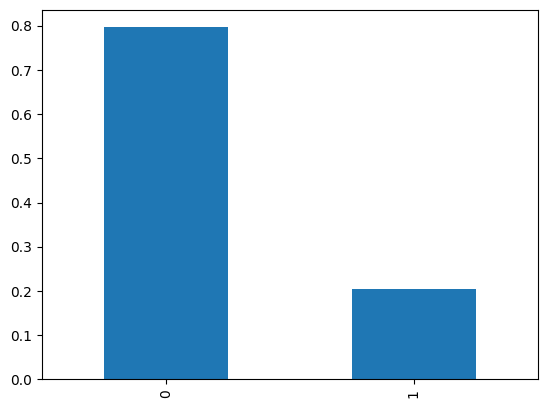

In [16]:
exited_frequency = df_para_modelo['Exited'].value_counts(normalize=True)
print(exited_frequency)
exited_frequency.plot(kind='bar')

#Revisamos la frecuencia en la que los usuarios abandonan el servicio del banco, para saber que tan desequilibrados están los datos.
#Con la gráfica podemos observar que tenemos más datos sobre clientes que conservan sus products bancarios. 
#La data está sesgada hacia clientes que no abandonan al banco.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)
predicted_valid = model_tree.predict(features_valid)

confusion_matrix = confusion_matrix(target_valid, predicted_valid)
print(confusion_matrix)

#Revisamos con la matrix de confusión la viabilidad del modelo. En este caso tenemos una gran cantidad de verdaderos negativos.
#Esto nos indica que el modelo piensa que los clientes no abandonan los servicios del banco; cuando realmente si se abandonan.

[[1389  220]
 [ 197  194]]


In [18]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

sensibilidad = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
print(f"Recall/sensibilidad del modelo:", sensibilidad)
print()
print(f"Precisión del modelo:", precision)

#Revisamos la sensibilidad y precision del modelo, en este caso el modelo está prediciendo correctamente menos de la mitad de las respuesta.
#El modelo tiene una precisión del 46% lo cual es baja para el modelo, necesitamos crear una mayor precisión.

Recall/sensibilidad del modelo: 0.4961636828644501

Precisión del modelo: 0.46859903381642515


In [19]:
from sklearn.metrics import f1_score

f1 = f1_score(target_valid, predicted_valid)

print(f"F1:", f1)

#El valor de F1 es bajo, lo que nos indica que la mayoría de las predicciones se van a hacer de modo incorrecto.
#Usar un árbol de decisión no va a ser valido, tendremos que usar un modelo más robusto de clasificación

F1: 0.4819875776397516
